<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Analytics_vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the neccessary Library**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading Training DataSet**

In [52]:
df_raw_train=pd.read_csv("/content/drive/MyDrive/Analytics_vidya_hack/train_0OECtn8.csv")

**Reading Test DataSet**

In [53]:
df_raw_test=pd.read_csv("/content/drive/MyDrive/Analytics_vidya_hack/test_1zqHu22.csv")

**EDA**

In [ ]:
df_raw_train.shape

(89197, 10)

In [54]:
df_raw_train.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [55]:
df_raw_train.drop(df_raw_train.columns[[0, 1]], axis = 1, inplace = True)

In [56]:
df_raw_train.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,Male,Student,180,1000,4.33
1,32,132,14,Female,Student,330,714,1.79
2,12,24,19,Male,Student,180,138,4.35
3,23,112,19,Male,Student,220,613,3.77
4,23,112,27,Male,Working Professional,220,613,3.13


In [ ]:
df_raw_train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [ ]:
df_raw_train['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

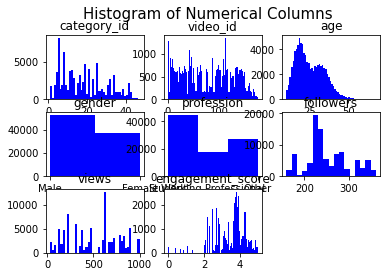

In [ ]:
plt.suptitle('Histogram of Numerical Columns', fontsize = 15)
for i in range(1, df_raw_train.shape[1]+ 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df_raw_train.columns.values[i - 1])
    
    vals = np.size(df_raw_train.iloc[:, i - 1].unique())
    
    plt.hist(df_raw_train.iloc[:, i - 1], bins = vals, color = 'blue')

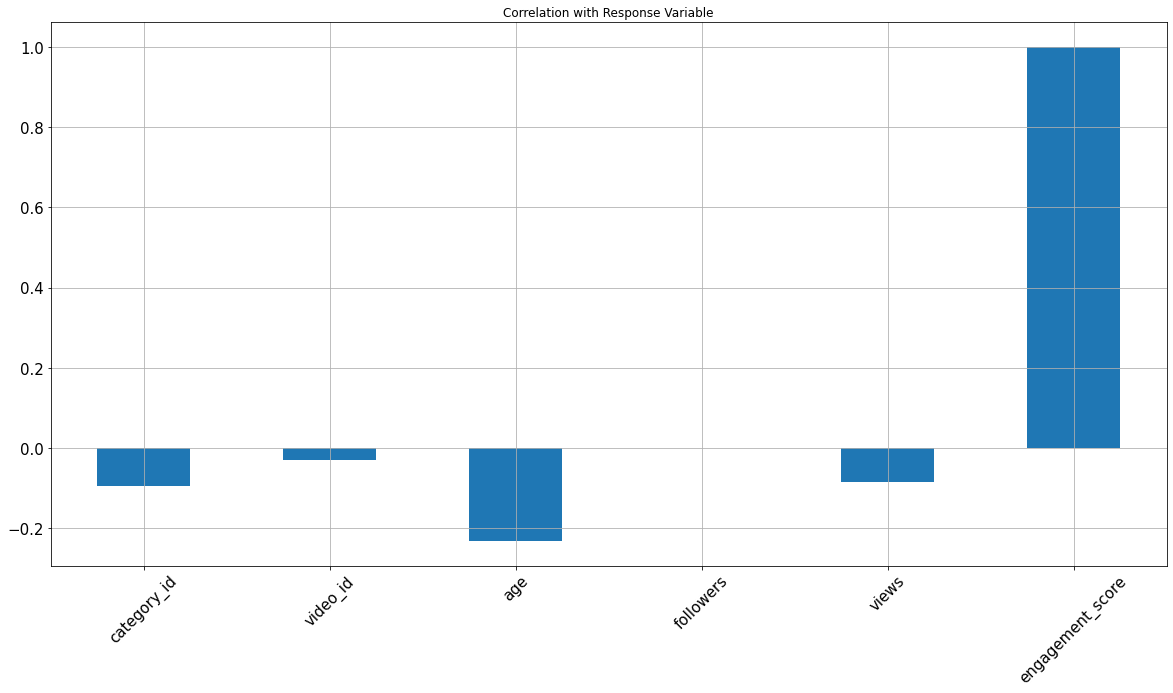

In [ ]:
df_raw_train.corrwith(df_raw_train.engagement_score).plot.bar(figsize = (20, 10),
                  title = 'Correlation with Response Variable',
                  fontsize = 15, rot = 45,
                  grid = True)

In [57]:
df_raw_train.dtypes

category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

**Removing Outliers**

In [58]:
cols = ['category_id','video_id','age','followers','views'] # one or more

Q1 = df_raw_train[cols].quantile(0.25)
Q3 = df_raw_train[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_train = df_raw_train[~((df_raw_train[cols] < (Q1 - 1.5 * IQR)) |(df_raw_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [59]:
df_raw_train.shape

(89197, 8)

In [60]:
df_new_train.shape

(87176, 8)

In [61]:
df_new_train.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,Male,Student,180,1000,4.33
1,32,132,14,Female,Student,330,714,1.79
2,12,24,19,Male,Student,180,138,4.35
3,23,112,19,Male,Student,220,613,3.77
4,23,112,27,Male,Working Professional,220,613,3.13


**Multicolinearity**

In [ ]:
VIF = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(x_train.shape[1]):
    VIF.append(variance_inflation_factor(x_train.values,j))
print(VIF)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[5.166702457618238, 5.390482818733854, 7.236991135810488, 13.873815748223164, 5.101635418963957]


In [ ]:
np.transpose(VIF)
pd.DataFrame(x_train.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

,0,0
0,category_id,5.166702
1,video_id,5.390483
2,age,7.236991
3,followers,13.873816
4,views,5.101635


In [62]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_new_train['gender'] = LE.fit_transform(df_new_train['gender'])
df_new_train['profession'] = LE.fit_transform(df_new_train['profession'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
df_new_train.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,1,1,180,1000,4.33
1,32,132,14,0,1,330,714,1.79
2,12,24,19,1,1,180,138,4.35
3,23,112,19,1,1,220,613,3.77
4,23,112,27,1,2,220,613,3.13


In [68]:
x= df_new_train[df_new_train.columns[[0,1,2,3,4,5,6]]]

In [67]:
y= df_new_train['engagement_score']

**Scaling the Data**

In [70]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x)

In [71]:
df_raw_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [74]:
x_test_dat= df_raw_test[df_raw_test.columns[[2,3,4,5,6,7,8]]]

In [75]:
x_test_dat.head()

,category_id,video_id,age,gender,profession,followers,views
0,12,42,14,Male,Student,180,138
1,34,115,14,Male,Student,230,840
2,8,110,44,Female,Working Professional,280,628
3,16,137,18,Male,Student,270,462
4,34,96,47,Female,Other,230,840


In [ ]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x)

In [77]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x_test_dat['gender'] = LE.fit_transform(x_test_dat['gender'])
x_test_dat['profession'] = LE.fit_transform(x_test_dat['profession'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [78]:
from sklearn.preprocessing import StandardScaler
x_scale_test = StandardScaler().fit_transform(x_test_dat)

**Train and test split of Training Data**

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y, test_size=0.25, random_state=20)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(65382, 7)
(65382,)
(21794, 7)
(21794,)


**Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred_lr = LR.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)*100
print(mse_lr)
print(r2_score_lr)

0.5755592139645712
22.82406315134857


**Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion = "mse", max_depth=9)

In [30]:
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [31]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_score_dt = r2_score(y_test, y_pred_dt)*100
print(mse_dt)
print(r2_score_dt)

0.5188600259043119
30.426778651230634


In [ ]:
dt_mse_score = []
dt_r2_score = []
md = range(1,10)
for i in md:
    dt = DecisionTreeRegressor(criterion = "mse", max_depth=i)
    dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    dt_r2_score.append(r2_score(y_test, y_pred_dt)*100)
    dt_mse_score.append(mean_squared_error(y_test,dt_pred))
print(dt_mse_score)
print(dt_r2_score)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[0.6226069262980123, 0.5858880660952874, 0.5595018728410336, 0.5462542406948617, 0.5342413881054077, 0.5247331139275238, 0.5188812803514556, 0.5124050645901812, 0.5098357575220442]
[31.648415530622742, 31.648415530622742, 31.648415530622742, 31.648415530622742, 31.648415530622742, 31.648415530622742, 31.648415530622742, 31.648415530622742, 31.648415530622742]


No handles with labels found to put in legend.


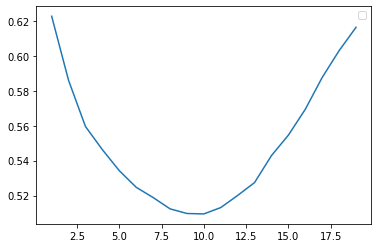

In [ ]:
import matplotlib.pyplot as plt
plt.plot(md, dt_mse_score)
plt.legend()
plt.show()

No handles with labels found to put in legend.


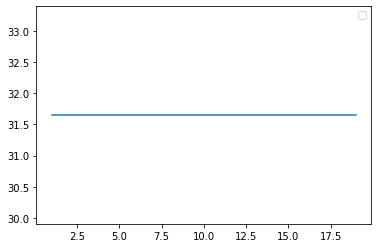

In [ ]:
import matplotlib.pyplot as plt
plt.plot(md, dt_r2_score)
plt.legend()
plt.show()

**Bagging**

In [33]:
from sklearn.ensemble import BaggingRegressor
Bag= BaggingRegressor(base_estimator=DT, max_samples=0.9,
                  n_estimators=500)

In [34]:
Bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=9),
                 max_samples=0.9, n_estimators=500)

In [35]:
y_pred_bag= Bag.predict(x_test)

In [36]:
bag_mse = mean_squared_error(y_test,y_pred_bag)
bag_r2_score = r2_score(y_test,y_pred_bag)*100
print(bag_mse)
print(bag_r2_score)

0.4996428048188105
33.00358917726719


In [37]:
import numpy as np
mse_bag=[]
r2_bag = []
settings = np.arange(0.1,1,0.1)

In [38]:
for i in settings:
    bag =BaggingRegressor(base_estimator=DT, max_samples=i, n_estimators=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_test)
    mse_bag.append(mean_squared_error(y_test,y_pred_bag))
    r2_bag.append(r2_score(y_test,y_pred_bag)*100)
print(mse_bag)
print(r2_bag)

[0.4996428048188105, 0.4996428048188105, 0.4996428048188105, 0.4996428048188105, 0.4996428048188105, 0.4996428048188105, 0.4996428048188105, 0.4996428048188105, 0.4996428048188105]
[33.00358917726719, 33.00358917726719, 33.00358917726719, 33.00358917726719, 33.00358917726719, 33.00358917726719, 33.00358917726719, 33.00358917726719, 33.00358917726719]


**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_features=0.9, n_estimators=1000)
RF.fit(x_train,y_train)
y_RF_pred = RF.predict(x_test)

In [48]:
rf_mse = mean_squared_error(y_test,y_RF_pred)
rf_r2_score = r2_score(y_test,y_RF_pred)*100
print(rf_mse)
print(rf_r2_score)

0.49583070793894657
33.514747961495125


In [46]:
df_raw_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,1,1,180,138
1,89199,11278,34,115,14,1,1,230,840
2,89200,17245,8,110,44,0,2,280,628
3,89201,9851,16,137,18,1,1,270,462
4,89202,16008,34,96,47,0,0,230,840


In [81]:
df_raw_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [84]:
roll_id = df_raw_test['row_id']

In [80]:
enagement_score = RF.predict(x_scale_test)
print(enagement_score)

[3.24589 2.82341 3.94846 ... 3.71484 3.75765 3.98698]


In [95]:
enagement_score.to_excel(r'/content/drive/MyDrive/Analytics_vidya_hack/enagement_score.xlsx', index = False)

In [42]:
RF_MSE = []
RF_r2 = []
setting = np.arange(0.1,1,0.1)
for i in setting:
    RF = RandomForestRegressor(max_features=i, n_estimators=100)
    RF.fit(x_train,y_train)
    RF_pred = RF.predict(x_test)
    RF_MSE.append(mean_squared_error(y_test,y_RF_pred))
    RF_r2.append(r2_score(y_test,y_RF_pred)*100)

print(RF_MSE)
print(RF_r2)


[0.49588831275838313, 0.49588831275838313, 0.49588831275838313, 0.49588831275838313, 0.49588831275838313, 0.49588831275838313, 0.49588831275838313, 0.49588831275838313, 0.49588831275838313]
[33.50702381113987, 33.50702381113987, 33.50702381113987, 33.50702381113987, 33.50702381113987, 33.50702381113987, 33.50702381113987, 33.50702381113987, 33.50702381113987]


**Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADBR = AdaBoostRegressor(base_estimator=DT, n_estimators=1000)
ADBR.fit(x_train,y_train)
y_pred_adab = ADBR.predict(x_test)

In [ ]:
mse_adab = mean_squared_error(y_test,y_pred_adab)
r2_adab = r2_score(y_test,y_pred_adab)*100
print(mse_adab)
print(r2_adab)

1.5222559625983485
-104.1171910492686


**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GRB = GradientBoostingRegressor()
GRB.fit(x_train,y_train)
y_pred_grb= GRB.predict(x_test)

In [ ]:
mse_grb = mean_squared_error(y_test,y_pred_grb)
r2_grb = r2_score(y_test,y_pred_grb)*100
print(mse_grb)
print(r2_grb)

0.495603800426904
33.545173675122854


**XG boost**

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train,y_train)
y_pred_xgb= XGB.predict(x_test)

[18:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
r2_xgbb = r2_score(y_test,y_pred_xgb)*100
print(mse_xgb)
print(r2_xgbb)

0.49595811683527175
33.49766387927009


**ANN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model= Sequential()
model.add(Dense(8,activation='relu',name='input'))
model.add(Dense(12,activation='relu',name='hidden'))
model.add(Dense(1,name='output'))

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(x =x_train, y= y_train, validation_data=(x_test,y_test), batch_size=2000, epochs=1000, verbose=0)

In [ ]:
losses = pd.DataFrame(model.history.history)
print(losses)

           loss   val_loss
0    409.877472  73.164917
1     50.237396  39.050827
2     33.717842  27.933149
3     24.811796  20.962681
4     18.831455  16.125164
..          ...        ...
495    0.583123   0.568176
496    0.586622   0.585477
497    0.575762   0.592359
498    0.572742   0.589008
499    0.569181   0.569665

[500 rows x 2 columns]


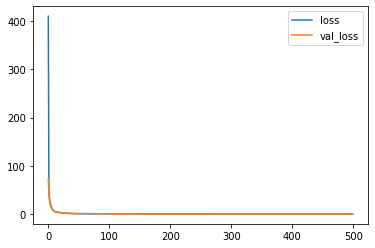

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
y_pred_ann = model.predict(x_test)

In [ ]:
mse_ann = mean_squared_error(y_test,y_pred_ann)
r2_ann = r2_score(y_test,y_pred_ann)*100
print(mse_ann)
print(r2_ann)

0.5696653844238635
23.614358581243945


**Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(x_train,y_train)
y_pred_sgdr = sgdr.predict(x_test)

In [ ]:
mse_sgdr = mean_squared_error(y_test,y_pred_sgdr)
r2_sgdr = r2_score(y_test,y_pred_sgdr)*100
print(mse_sgdr)
print(r2_sgdr)

0.5739139216479251
23.04467811649249


In [ ]:
sgdr = SGDRegressor()


In [ ]:
setting = np.arange(0.1,2,0.001)
sgdr_test_error = []
sgdr_r2_score =[]

In [ ]:
setting

array([0.1  , 0.101, 0.102, ..., 1.997, 1.998, 1.999])

In [ ]:
for i in setting:
    sgd = SGDRegressor(eta0=i, max_iter =1000 )
    sgd.fit(x_train,y_train)
    y_pred_sgd = sgd.predict(x_test)
    sgdr_test_error.append(mean_squared_error(y_test,y_pred_sgd))
    sgdr_r2_score.append(r2_score(y_test,y_pred_sgd)*100)

In [ ]:
print(sgdr_test_error)
print(sgdr_r2_score)

[0.5928975892889226, 0.5774142834941361, 0.5780550753455352, 0.5755828708278653, 0.582615946685115, 0.5846857939238425, 0.5850360580226632, 0.5785487288943086, 0.5794322540156384, 0.5774181216251635, 0.5857500128299084, 0.580060003500214, 0.5908090656434913, 0.5872469299957572, 0.5836019118896912, 0.5821804259966147, 0.5890591501448624, 0.5897220622186375, 0.5816260861658011, 0.5887531432952425, 0.582291539843106, 0.591109872650017, 0.5796637394461774, 0.5759180123960642, 0.5922137387629988, 0.5820778390289657, 0.5777026808800951, 0.5804057644551461, 0.5894854248216682, 0.5871436220900845, 0.5828160722949294, 0.5787587430938064, 0.593875761806388, 0.5838233655631584, 0.587761832979464, 0.5947784989099794, 0.5866798703607605, 0.5817226966307862, 0.5843772462236116, 0.579502178076713, 0.5764375066201536, 0.5866294381567252, 0.5758925705263647, 0.5836234890031333, 0.5901636569577735, 0.5794209004457579, 0.5808452224117274, 0.5766460472146694, 0.5900518113009656, 0.5793461704009357, 0.5745

In [ ]:
plt.plot(setting,sgdr_r2_score, label = "R2_score")
plt.plot(setting,sgdr_test_error, label = "sgdr_test_error")
plt.legend()
plt.show()